In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [6]:
pd.set_option('display.max_rows', 3000)

In [8]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [9]:
headers = ["Age", "Gender", "BMI", "NoOfChildren", "Smoker", "Region", "Charges"]
df.columns = headers
df

,Age,Gender,BMI,NoOfChildren,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.924000
1,18,2,33.770,1,0,4,1725.552300
2,28,2,33.000,3,0,4,4449.462000
3,33,2,22.705,0,0,1,21984.470610
4,32,2,28.880,0,0,1,3866.855200
5,31,1,25.740,0,?,4,3756.621600
6,46,1,33.440,1,0,4,8240.589600
7,37,1,27.740,3,0,1,7281.505600
8,37,2,29.830,2,0,2,6406.410700
9,60,1,25.840,0,0,1,28923.136920


In [10]:
df.replace('?', np.nan, inplace = True)
df

,Age,Gender,BMI,NoOfChildren,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.924000
1,18,2,33.770,1,0,4,1725.552300
2,28,2,33.000,3,0,4,4449.462000
3,33,2,22.705,0,0,1,21984.470610
4,32,2,28.880,0,0,1,3866.855200
5,31,1,25.740,0,NaN,4,3756.621600
6,46,1,33.440,1,0,4,8240.589600
7,37,1,27.740,3,0,1,7281.505600
8,37,2,29.830,2,0,2,6406.410700
9,60,1,25.840,0,0,1,28923.136920


In [12]:
#df.info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2768 non-null   object 
 1   Gender        2772 non-null   int64  
 2   BMI           2772 non-null   float64
 3   NoOfChildren  2772 non-null   int64  
 4   Smoker        2765 non-null   object 
 5   Region        2772 non-null   int64  
 6   Charges       2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [14]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2772 non-null   int32  
 1   Gender        2772 non-null   int64  
 2   BMI           2772 non-null   float64
 3   NoOfChildren  2772 non-null   int64  
 4   Smoker        2772 non-null   int32  
 5   Region        2772 non-null   int64  
 6   Charges       2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [16]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

   Age  Gender     BMI  NoOfChildren  Smoker  Region   Charges
0   19       1  27.900             0       1       3  16884.92
1   18       2  33.770             1       0       4   1725.55
2   28       2  33.000             3       0       4   4449.46
3   33       2  22.705             0       0       1  21984.47
4   32       2  28.880             0       0       1   3866.86


(0.0, 66902.85800000001)

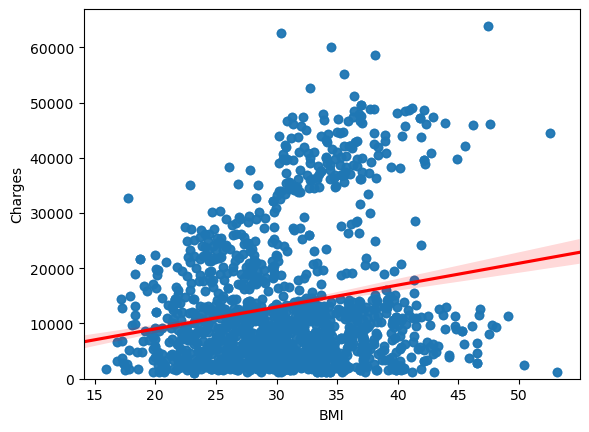

In [25]:
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

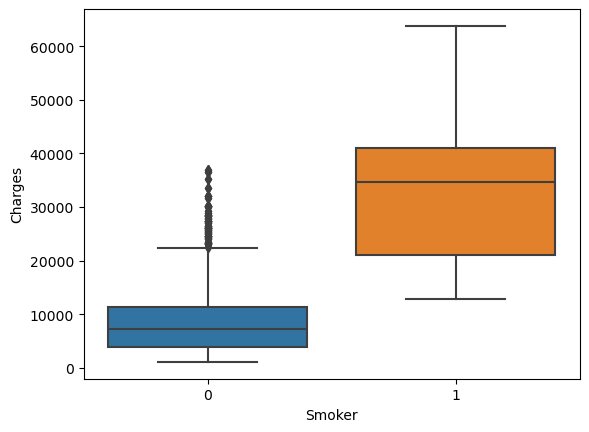

In [26]:
sns.boxplot(x="Smoker", y="Charges", data=df)

In [22]:
print(df.corr())

                   Age    Gender       BMI  NoOfChildren    Smoker    Region  \
Age           1.000000 -0.026046  0.113048      0.037574 -0.023286 -0.007167   
Gender       -0.026046  1.000000  0.042924      0.016020  0.082326  0.022213   
BMI           0.113048  0.042924  1.000000     -0.001492  0.011489  0.271119   
NoOfChildren  0.037574  0.016020 -0.001492      1.000000  0.006362 -0.025717   
Smoker       -0.023286  0.082326  0.011489      0.006362  1.000000  0.054077   
Region       -0.007167  0.022213  0.271119     -0.025717  0.054077  1.000000   
Charges       0.298624  0.062837  0.199846      0.066442  0.788783  0.054058   

               Charges  
Age           0.298624  
Gender        0.062837  
BMI           0.199846  
NoOfChildren  0.066442  
Smoker        0.788783  
Region        0.054058  
Charges       1.000000  


In [29]:
X = df[['Smoker']]
Y = df['Charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


In [30]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["Age", "Gender", "BMI", "NoOfChildren", "Smoker", "Region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [31]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452185829581498


In [32]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [33]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582402


In [34]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608144
